# Churn Case Study

## Context

"Predict behavior to retain customers. You can analyze all relevant customer data and develop focused customer retention programs." [IBM Sample Data Sets]


<img src="https://images.pexels.com/photos/3078/home-dialer-siemens-telephone.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260" style="width:400px">

**Client**: Telco Company in the USA offering triple play (phone, internet and TV).

They want a better way to spot potential churning customers and suggested actions what to do.

## Business problem

#### Stakeholder:

- Sales/customer retention department
- Non-technical stakeholder


#### True business problem:

- Predict wether a customer churns in the next month or not
- Explore trends that lead to customer churn 
    - Explore our FEATURES - both before modeling, and using feature importnace


#### Deliverables: Inference or Prediction?

- Let's try to balance both.
    - We'll try to balance complexity with interpretability


#### Context:

- **False negative** Model predicts churn but they stay
    - **Outcome**: Waste time/money/effort - might get some customers used to special treatment, which could drive them away when that stops
- **False positive** Model predicts stay but churn
    - **Outcome**: Lose customer, and we did nothing to stop them
    
Would prefer reducing false positives over false negatives

### Evaluation Metric
Which metric would make sense to primarily use as we evaluate our models?

- **Accuracy** 
    - balance the two kinds of errors (but is impratical with imbalanced targets)
    
    
- **Precision**
    - helps reduce false positves
    
    
- Recall
    - helps reduce false negatives
    
    
- F1-Score
    - balances recall and precesion (and is better than accuracy with imbalanced targets)
    
    
- **ROC-AUC**
    - helps focus on better probability outputs (makes sure our predicted probabilites are better)

## Data Understanding

In [1]:
# Initial imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [2]:
# Load dataset
url_link = 'https://docs.google.com/spreadsheets/d/1TAWfdKnWYiCzKUeDyGL6NzIOv7AxFt_Sfzzax464_FQ/export?format=csv&gid=882919979'
telco = pd.read_csv(url_link)

telco = telco.dropna()

# Train-test-split
X_train, X_test, y_train, y_test = train_test_split(
    telco.drop(columns=['customerID','Churn']), 
    np.where(telco.Churn =="Yes", 1, 0),
    test_size=0.33, random_state=42)


In [3]:
X_train.head()

,gender,SeniorCitizen,MaritalStatus,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue
3138,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,...,85,261.6,105,12.4,5,0,283,0,0,19.1
626,Male,0,Yes,Yes,58,Yes,No,Fiber optic,No,Yes,...,108,183.8,77,11.8,7,1,273,2689,161,5305.1
347,Male,0,Yes,Yes,1,Yes,No,No,No internet service,No internet service,...,92,185.3,120,7.6,3,1,344,0,0,19.9
2130,Male,0,No,No,4,Yes,No,Fiber optic,No,No,...,142,107.3,84,12.2,2,0,306,666,173,299.2
2047,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,...,128,186.0,83,7.4,3,0,291,0,0,19.8


In [4]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 3138 to 3179
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     2229 non-null   object 
 1   SeniorCitizen              2229 non-null   int64  
 2   MaritalStatus              2229 non-null   object 
 3   Dependents                 2229 non-null   object 
 4   tenure                     2229 non-null   int64  
 5   PhoneService               2229 non-null   object 
 6   MultipleLines              2229 non-null   object 
 7   InternetService            2229 non-null   object 
 8   OnlineSecurity             2229 non-null   object 
 9   OnlineBackup               2229 non-null   object 
 10  DeviceProtection           2229 non-null   object 
 11  TechSupport                2229 non-null   object 
 12  StreamingTV                2229 non-null   object 
 13  StreamingMovies            2229 non-null   ob

In [5]:
X_train.describe()

,SeniorCitizen,tenure,NumbervMailMessages,TotalDayMinutes,TotalDayCalls,TotalEveMinutes,TotalEveCalls,TotalNightMinutes,TotalNightCalls,TotalIntlMinutes,TotalIntlCalls,CustomerServiceCalls,TotalCall,TotalHighBandwidthMinutes,TotalHighLatencyMinutes,TotalRevenue
count,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000,2229.000000
mean,0.105877,28.087483,7.863616,179.493315,100.617766,201.778645,100.579632,199.837012,100.050695,10.282279,4.499776,1.559892,307.307761,537.415882,86.786003,1667.763122
std,0.307749,23.296311,13.569929,54.844475,20.119285,51.042977,19.744157,50.245927,19.416595,2.774424,2.474398,1.324275,34.304600,803.635181,156.276844,1926.311521
min,0.000000,1.000000,0.000000,0.000000,0.000000,31.200000,36.000000,23.200000,33.000000,0.000000,0.000000,0.000000,194.000000,0.000000,0.000000,18.800000
25%,0.000000,7.000000,0.000000,143.600000,88.000000,166.900000,87.000000,166.300000,87.000000,8.600000,3.000000,1.000000,284.000000,0.000000,0.000000,246.700000
50%,0.000000,23.000000,0.000000,179.200000,101.000000,201.000000,101.000000,199.700000,100.000000,10.300000,4.000000,1.000000,308.000000,167.000000,18.000000,892.700000
75%,0.000000,48.000000,18.000000,216.600000,114.000000,236.400000,114.000000,234.500000,113.000000,12.100000,6.000000,2.000000,330.000000,625.000000,84.000000,2416.100000
max,1.000000,72.000000,51.000000,346.800000,165.000000,363.700000,168.000000,381.900000,175.000000,20.000000,20.000000,9.000000,404.000000,2998.000000,1001.000000,8476.500000


In [6]:
X_train.describe(include='O')

,gender,MaritalStatus,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,InternationalPlan,VoiceMailPlan
count,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229,2229
unique,2,2,2,1,2,3,3,3,3,3,3,3,3,2,4,2,2
top,Male,No,No,Yes,No,No,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,No,No
freq,1138,1232,1488,2229,2022,803,902,850,880,892,845,823,1185,1139,714,2005,1629


In [7]:
# Make a full dataset of training data to explore relationships with target
train_df = X_train.copy()
train_df['Churn'] = y_train

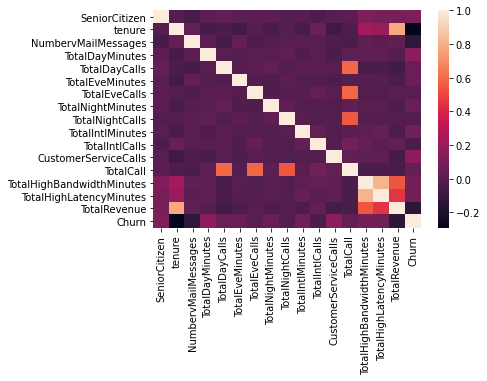

In [8]:
sns.heatmap(train_df.corr());

In [9]:
# sns.pairplot(train_df);

### EDA Observations:

Any initial findings?

- 'tenure' might be useful
- multicollinearity (calls)
- totals aren't divided by tenure
- 'phone service' was all the same value (not useful)


Any ideas for feature engineering come to mind?

- drop come 'total call' columns, drop 'phone service'
- might want to divide totals by tenure


## Data Processing

### Describe Necessary Preprocessing Steps

- drop unnecessary columns - might help with obvious multicoll.
- one hot encode for string columns
- scale (for linear models)


In [10]:
# Imports
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Probably need more imports than just these!
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [11]:
X_train['VoiceMailPlan'].dtype

dtype('O')

In [12]:
cat_columns = [c for c in X_train.columns if X_train[c].dtype == 'O']
cat_columns.remove('PhoneService')

len(cat_columns)

16

In [13]:
[c for c in X_train.columns if c not in cat_columns]

['SeniorCitizen',
 'tenure',
 'PhoneService',
 'NumbervMailMessages',
 'TotalDayMinutes',
 'TotalDayCalls',
 'TotalEveMinutes',
 'TotalEveCalls',
 'TotalNightMinutes',
 'TotalNightCalls',
 'TotalIntlMinutes',
 'TotalIntlCalls',
 'CustomerServiceCalls',
 'TotalCall',
 'TotalHighBandwidthMinutes',
 'TotalHighLatencyMinutes',
 'TotalRevenue']

In [14]:
num_columns = ['SeniorCitizen',
 'tenure',
 'NumbervMailMessages',
 'TotalDayMinutes',
 'TotalEveMinutes',
 'TotalNightMinutes',
 'TotalIntlMinutes',
 'CustomerServiceCalls',
 'TotalCall',
 'TotalHighBandwidthMinutes',
 'TotalHighLatencyMinutes',
 'TotalRevenue']
len(num_columns)

12

In [15]:
used_cols = [*cat_columns, *num_columns]
used_cols

['gender',
 'MaritalStatus',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'InternationalPlan',
 'VoiceMailPlan',
 'SeniorCitizen',
 'tenure',
 'NumbervMailMessages',
 'TotalDayMinutes',
 'TotalEveMinutes',
 'TotalNightMinutes',
 'TotalIntlMinutes',
 'CustomerServiceCalls',
 'TotalCall',
 'TotalHighBandwidthMinutes',
 'TotalHighLatencyMinutes',
 'TotalRevenue']

#### making pipeline

In [16]:
cat_transformer = OneHotEncoder(drop='first')

num_transformer = StandardScaler()

In [17]:
preprocessor = ColumnTransformer([
    ('cats', cat_transformer, cat_columns),
    ('nums', num_transformer, num_columns)
])

## Initial Modeling

### Model-less Baseline

In [18]:
pd.Series(y_train).value_counts(normalize=True)

0    0.808883
1    0.191117
dtype: float64

#### Evaluate:

- If we predict that no one churns, we'd be right about 80% of the time
- Class imbalance - imbalanced target!


In [19]:
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, f1_score, precision_score, roc_auc_score

### Model 1: Decision Tree

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
clf_dt = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('tree', DecisionTreeClassifier(random_state=42, max_depth=5))
])

clf_dt.fit(X_train[used_cols], y_train)

# train_preds = clf_dt.predict(X_train[used_cols])
# test_preds = clf_dt.predict(X_test[used_cols])

# train_probas = clf_dt.predict_proba(X_train[used_cols])[:,1]
# test_probas = clf_dt.predict_proba(X_train[used_cols])[:,1]

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'MaritalStatus',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'Payme

In [22]:
# plot_confusion_matrix(clf_dt, X_test[used_cols], y_test)

In [23]:
# plot_roc_curve(clf_dt, X_test[used_cols], y_test)

In [24]:
# print(f'Train F1: {f1_score(y_train, train_preds):4f}')
# print(f'Train Precision: {precision_score(y_train, train_preds):4f}')
# print(f'Train F1: {roc_auc_score(y_train, train_preds):4f}')
# print('*' * 20)
# print(f'Test F1: {f1_score(y_test, test_preds):4f}')
# print(f'Test Precision: {precision_score(y_test, test_preds):4f}')
# print(f'Test F1: {roc_auc_score(y_test, test_preds):4f}')

In [33]:
def evaluate(model, Xtr, Xte, ytr, yte):
    train_preds = clf_dt.predict(Xtr)
    test_preds = clf_dt.predict(Xte)

    train_probas = clf_dt.predict_proba(Xtr)[:,1]
    test_probas = clf_dt.predict_proba(Xte)[:,1]
    
    plot_confusion_matrix(model, Xte, yte)
    
    plot_roc_curve(model, Xte, yte)
    
    print(f'Train F1: {f1_score(ytr, train_preds):4f}')
    print(f'Train Precision: {precision_score(ytr, train_preds):4f}')
    print(f'Train ROC_AUC: {roc_auc_score(ytr, train_probas):4f}')
    print('*' * 20)
    print(f'Test F1: {f1_score(yte, test_preds):4f}')
    print(f'Test Precision: {precision_score(yte, test_preds):4f}')
    print(f'Test ROC_AUC: {roc_auc_score(yte, test_probas):4f}')

Train F1: 0.690476
Train Precision: 0.790909
Train ROC_AUC: 0.891913
********************
Test F1: 0.615385
Test Precision: 0.704545
Test ROC_AUC: 0.850796


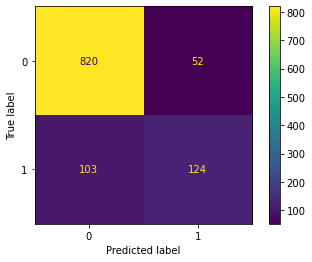

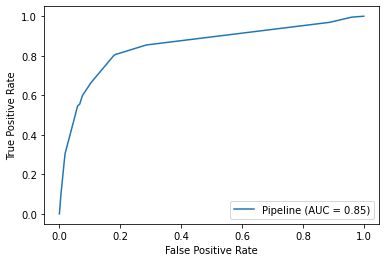

In [34]:
evaluate(clf_dt, X_train[used_cols], X_test[used_cols], y_train, y_test)

#### Evaluate:

- DT's would work well if:
    - lots of categorical columns
    - columns have nonlinear relationship with target, or interaction terms 
    
Is a decision tree a good fit for this data or this business problem?
- it's an okay fit - could tune or add complexity to reduce overfitting,, plus dts work well with complex people data (lots of interctions)



### Model 2: Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

In [35]:
clf_lr = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('logreg', LogisticRegression(random_state=42))
])

clf_lr.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'MaritalStatus',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'Payme

Train F1: 0.690476
Train Precision: 0.790909
Train ROC_AUC: 0.891913
********************
Test F1: 0.615385
Test Precision: 0.704545
Test ROC_AUC: 0.850796


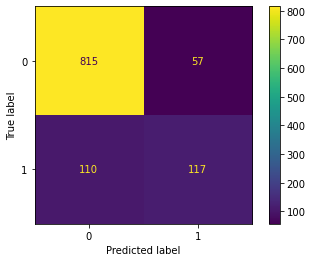

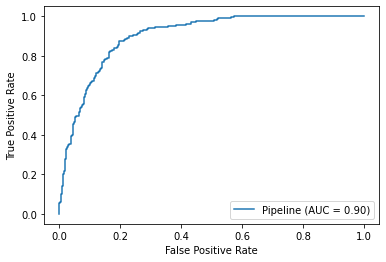

In [36]:
evaluate(clf_lr, X_train[used_cols], X_test[used_cols], y_train, y_test)

#### Evaluate:

LogReg would work well if:
- linear relationship between inputs and target

Is LR a good fit?
- not overfitting, that's good!
- but... probably underfit - would take some good feature engineering to get my false positives down
- BUT good roc-auc - could just need to adjust threshold


### Model 3: 

In [30]:
from sklearn.naive_bayes import ComplementNB, GaussianNB

In [31]:
clf_nb = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('bayes', GaussianNB())
])

clf_nb.fit(X_train[used_cols], y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cats',
                                                  OneHotEncoder(drop='first'),
                                                  ['gender', 'MaritalStatus',
                                                   'Dependents',
                                                   'MultipleLines',
                                                   'InternetService',
                                                   'OnlineSecurity',
                                                   'OnlineBackup',
                                                   'DeviceProtection',
                                                   'TechSupport', 'StreamingTV',
                                                   'StreamingMovies',
                                                   'Contract',
                                                   'PaperlessBilling',
                                                   'Payme

Train F1: 0.690476
Train Precision: 0.790909
Train F1: 0.787203
********************
Test F1: 0.615385
Test Precision: 0.704545
Test F1: 0.743311


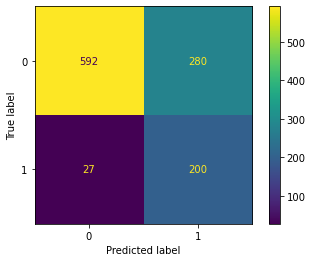

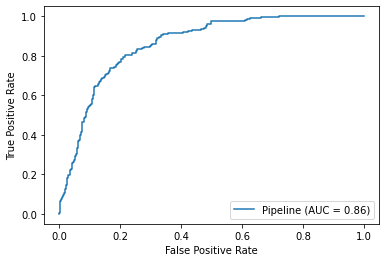

In [32]:
evaluate(clf_nb, X_train[used_cols], X_test[used_cols], y_train, y_test)

#### Evaluate:

- NB is good if a lot of input features, especially a lot of categories (one hot encoded columns)
- Good choice here? probably not


## Model Choice - Then Iterate!

What initial model currently best describes our data?

- DT
- accounting for nonlinearities (like interations) better


What model do we think would be the best fit for our business problem/data?

- can probability tune a DT quicker than feature engineering for logreg


Do we have any constraints? As in, do we need to have a simpler or more interpretable model for any reason?

- not necessarily - want good predictions AND to understand why



### Iterate!

After choosing our best simple model, let's explore better hyperparameters or a more complex version to improve our predictions!


Next steps would look like:

- Grid search for optimal hyperparameters for DT
- Try ensemble methods - and thhen tune those